## **ZAKI NUR AVERUS - 16119822**
## 3KA17

# **IMPORT LIBRARY**

In [1]:
#Import the libraries
from sklearn.svm import SVR #Support Vector Regression (SVR)
import numpy as np #library komputasi numerik
import pandas as pd #library untuk data science
import matplotlib.pyplot as plt #library untuk visualisasi data
plt.style.use('seaborn-darkgrid') #Style dari plot

# **LOAD DATA**

In [2]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('GOOG-Sep2021.csv') #Load data .csv sesuai dengan nama file
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


In [3]:
actual_price = df.tail(1) #Mengambil baris terakhir dari data
actual_price #print baris terakhir yang sudah diambil

,Date,Open,High,Low,Close,Adj Close,Volume
19,2021-09-29,2742.194092,2747.969971,2685.0,2690.419922,2690.419922,1316900


# **PREPARE DATA TRAINING**

In [4]:
df = df.head(len(df)-1) #Menyiapkan data training tanpa mengambil data baris terakhir
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


# **MEMBUAT VARIABEL INDEPENDET dan DEPENDENT DATA SET**

In [5]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [6]:
df_days = df.loc[:, 'Date'] #Mengambil data  kolom Date
df_adj_close = df.loc[:, 'Adj Close'] #Mengambil data  kolom Adj Close

In [7]:
#Create the independent data set
for day in df_days:
   days.append( [int(day.split('-')[2])] )  #Menambahkan data ke list yang sudah dipotong dengan pemisah '-' dan array ke [2] (tanggal)
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) ) #Menambahkan data ke list

In [8]:
print(days) #print tanggal yang sudah didapat dari kode sebelum ini

[[1], [2], [3], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27], [28]]


# **MEMBUAT dan MELATIH MODEL SVR**

In [9]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)

#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=2000.0, degree=3)
poly_svr.fit(days, adj_close_prices) 

#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=2500.0, gamma=0.2023)
rbf_svr.fit(days, adj_close_prices)

SVR(C=2500.0, gamma=0.2023)

# **MEMBUAT GRAFIK MODEL**

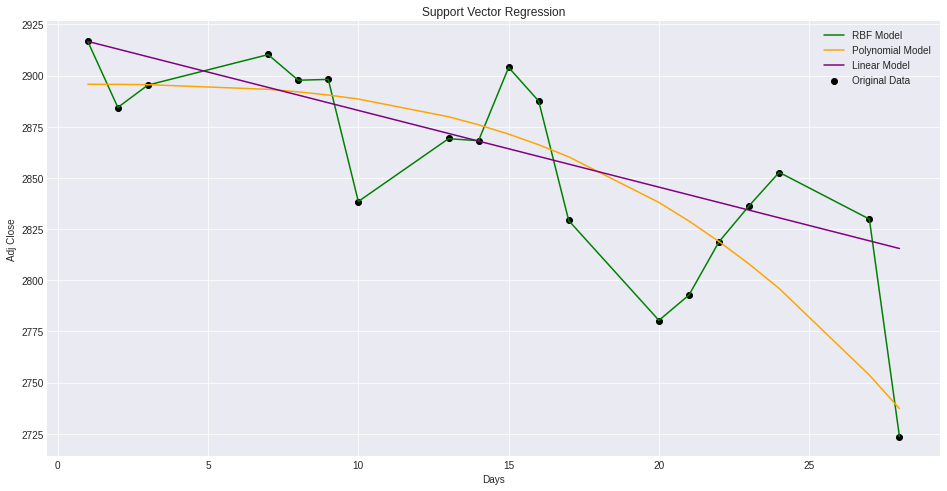

In [10]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# **MEMBUAT PREDIKSI**

In [13]:
day = [[29]] #PREDIKSI HARI YANG DIINGINKAN
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2690.40229871]
The Linear SVR predicted: [2811.80476585]
The Polynomial SVR predicted: [2719.74728849]


**MODEL TERBAIK DARI PREDIKSI YANG DIGUNAKAN MERUPAKAN RBF, KARENA PREDIKSI YANG DIBERIKAN MENDEKATI ANGKA SEBENERNYA DITANGGAL 29**